# Relax Inc. 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime
import time
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance
import xgboost
from xgboost import XGBClassifier
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn import preprocessing, metrics, tree
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

**Table of users**

In [80]:
# Read file
path1 = r'C:\Users\yuvem\Downloads\1481069814_relax_challenge\relax_challenge\takehome_users.csv'
takehome_users = pd.read_csv(path1)
takehome_users.head()

object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  
0             10803.0  
1               316.0  
2              1525.0  
3              5151.0  
4              5240.0

In [81]:
takehome_users.shape

(12000, 10)

In [82]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


**Table of users engagement**

In [83]:
# Read this file
path2 = r'C:\Users\yuvem\Downloads\1481069814_relax_challenge\relax_challenge\takehome_user_engagement.csv'
takehome_user_engagement = pd.read_csv(path2)
takehome_user_engagement.head()

time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1

In [84]:
takehome_user_engagement.shape

(207917, 3)

In [85]:
takehome_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


### 1 EDA

**Data description:**

    ● name:  the  user's  name
    ● object_id:   the  user's  id
    ● email:  email  address
    ● creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:
        ○ PERSONAL_PROJECTS:  invited  to  join  another  user's
        personal  workspace
        ○ GUEST_INVITE:  invited  to  an  organization  as  a  guest
        (limited  permissions)
        ○ ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
        ○ SIGNUP:  signed  up  via  the  website
        ○ SIGNUP_GOOGLE_AUTH:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  login id)
    ● creation_time:  when  they  created  their  account
    ● last_session_creation_time:   unix  timestamp  of  last  login
    ● opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails
    ● enabled_for_marketing_drip:  whether  they  are  on  the  regular marketing  email  drip
    ● org_id:   the  organization  (group  of  users)  they  belong  to
    ● invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).

In [86]:
# Check number of nulls for table of users
takehome_users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [87]:
# Look at values for 'last_session_creation_time' column
takehome_users.last_session_creation_time.unique()

array([1.39813881e+09, 1.39623750e+09, 1.36373489e+09, ...,
       1.39860272e+09, 1.33863816e+09, 1.39072663e+09])

Any nulls in last_session_creation_time we can assume is because the user is not active, or created an account but never used it or had an account prior to collection of this data, so it's safe to replace those nulls with a 0. 

In [88]:
# Look at values for 'invited_by_user_id' column
takehome_users.invited_by_user_id.unique()

array([10803.,   316.,  1525., ...,  5093., 11854.,  5450.])

Any nulls in invited_by_user_id is probably because they joined on their own without a referral. We can replace those nulls with a 0.

In real life, I would ask someone from my project team about the real context behind those null values and what the best way to deal with them would be. 

In [89]:
# Replace nulls
takehome_users.last_session_creation_time.fillna(0, inplace=True)
takehome_users.invited_by_user_id.fillna(0, inplace=True)

In [90]:
# Check
takehome_users.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

**Data Cleaning**

In [91]:
# Make a copy of takehome_users data
df_takehome_users = takehome_users.copy()

Not sure if 'name' and 'email' columns are needed for this data analysis (they're also personal information). Hence, we'll drop those.

In [92]:
# Drop sensitive info
sensitive_cols = ['name', 'email']
df_takehome_users.drop(sensitive_cols, axis=1, inplace=True)

In [93]:
df_takehome_users.columns

Index(['object_id', 'creation_time', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [94]:
# Function to convert to datetime
def to_datetime(df):
    date = pd.to_datetime(df)
    return date

In [95]:
df_takehome_users.creation_time = to_datetime(df_takehome_users.creation_time)

In [96]:
# Need to convert 'last_session_creation_time' another way
df_takehome_users.last_session_creation_time = pd.to_numeric(pd.to_datetime(df_takehome_users.last_session_creation_time))

In [97]:
# Check
df_takehome_users.head()

object_id       creation_time creation_source  last_session_creation_time  \
0          1 2014-04-22 03:53:30    GUEST_INVITE                  1398138810   
1          2 2013-11-15 03:45:04      ORG_INVITE                  1396237504   
2          3 2013-03-19 23:14:52      ORG_INVITE                  1363734892   
3          4 2013-05-21 08:09:28    GUEST_INVITE                  1369210168   
4          5 2013-01-17 10:14:20    GUEST_INVITE                  1358849660   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  
0             10803.0  
1               316.0  
2              1525.0  
3              5151.0  
4              5240.0

In [98]:
# There's still some conversions we need to do
df_takehome_users.opted_in_to_mailing_list = df_takehome_users['opted_in_to_mailing_list'].astype('bool')
df_takehome_users.enabled_for_marketing_drip = df_takehome_users['enabled_for_marketing_drip'].astype('bool')
df_takehome_users.invited_by_user_id = df_takehome_users['invited_by_user_id'].astype('int64')

In [99]:
df_takehome_users.dtypes

object_id                              int64
creation_time                 datetime64[ns]
creation_source                       object
last_session_creation_time             int64
opted_in_to_mailing_list                bool
enabled_for_marketing_drip              bool
org_id                                 int64
invited_by_user_id                     int64
dtype: object

In [100]:
# Create separate dataframe without date and time
date_n_time_cols = ['creation_time', 'last_session_creation_time']
pred_no_date = df_takehome_users.drop(date_n_time_cols, axis=1)

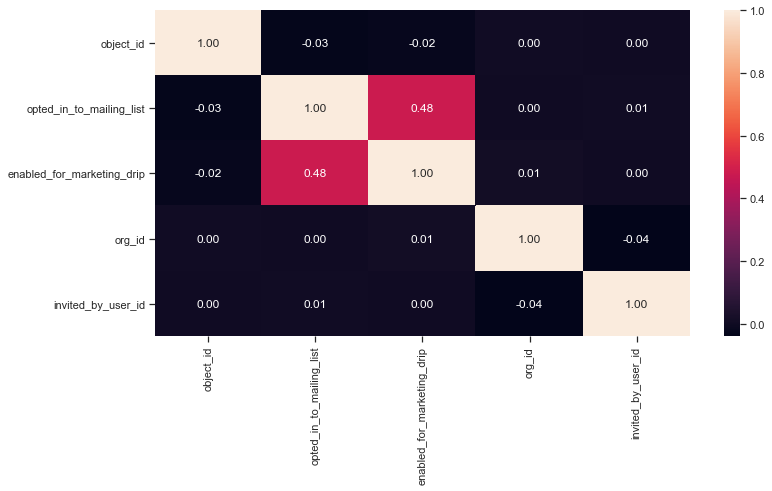

In [101]:
# Plot heatmap for correlation of numeric features
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
ax = sns.heatmap(pred_no_date.corr(), annot = True, fmt = ".2f")
plt.show()

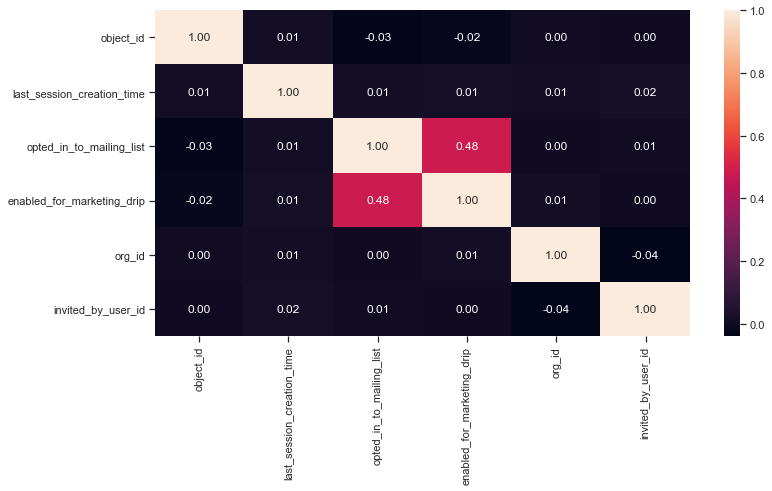

In [102]:
# Plot heatmap for correlation with date and time
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
ax = sns.heatmap(df_takehome_users.corr(), annot = True, fmt = ".2f")
plt.show()

In [103]:
# Let's go back and look at our table of user engagement
takehome_user_engagement.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [104]:
takehome_user_engagement.time_stamp.unique()

array(['2014-04-22 03:53:30', '2013-11-15 03:45:04',
       '2013-11-29 03:45:04', ..., '2014-04-27 12:45:16',
       '2012-06-02 11:55:59', '2014-01-26 08:57:12'], dtype=object)

In [105]:
takehome_user_engagement.time_stamp = to_datetime(takehome_user_engagement.time_stamp)

In [106]:
takehome_user_engagement.visited.unique()

array([1], dtype=int64)

In [107]:
takehome_user_engagement.user_id.unique()

array([    1,     2,     3, ..., 11998, 11999, 12000], dtype=int64)

So, this is a log of how many times and what days a user 'visited'. Let's group the data by the user_id and see how many times they visited each day/time.

In [108]:
# Set index to time_stamp
takehome_user_engagement = takehome_user_engagement.set_index('time_stamp')
# Groupby user_id. Let's count no. of logins weekly
takehome_user_engagement = takehome_user_engagement.groupby(by='user_id').resample('1W').sum()

In [109]:
# Check
takehome_user_engagement

user_id  visited
user_id time_stamp                  
1       2014-04-27        1        1
2       2013-11-17        2        1
        2013-11-24        0        0
        2013-12-01        2        1
        2013-12-08        0        0
...                     ...      ...
11996   2013-09-08    11996        1
11997   2013-01-20    11997        1
11998   2014-04-27    11998        1
11999   2012-06-03    11999        1
12000   2014-01-26    12000        1

[82282 rows x 2 columns]

In [110]:
takehome_user_engagement.columns

Index(['user_id', 'visited'], dtype='object')

In [111]:
# Drop the extra user_id column
takehome_user_engagement.drop(index=1, columns='user_id').head(20)

visited
user_id time_stamp         
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0
        2013-12-15        1
        2013-12-22        0
        2013-12-29        1
        2014-01-05        1
        2014-01-12        1
        2014-01-19        0
        2014-01-26        0
        2014-02-02        0
        2014-02-09        3
        2014-02-16        2
        2014-02-23        0
        2014-03-02        0
        2014-03-09        1
        2014-03-16        1
        2014-03-23        0
        2014-03-30        0

This is actually useful information that we'd want to add to the table of users dataframe. Let's tweak it a bit.

In [112]:
# Create a separate dataframe with at least 3 visits
frequent_visitor = takehome_user_engagement[takehome_user_engagement['visited'] >= 3]
frequent_visitor.head(15)

user_id  visited
user_id time_stamp                  
2       2014-02-09        6        3
10      2013-03-03       30        3
        2013-04-14       30        3
        2013-04-28       30        3
        2013-05-05       40        4
        2013-05-12       50        5
        2013-05-19       30        3
        2013-06-09       40        4
        2013-06-16       50        5
        2013-06-23       30        3
        2013-06-30       30        3
        2013-07-07       40        4
        2013-07-14       30        3
        2013-07-21       50        5
        2013-07-28       40        4

In [113]:
# Unique user id
frequent_visitor_id = list(frequent_visitor.index.unique(level=0))

In [114]:
# Merging or joining, and append introduced duplicates
# Let's find no. of frequent users
len(frequent_visitor_id)

1445

In [115]:
df_takehome_users.shape

(12000, 8)

In [116]:
# Add a new column with the frequent visitors
pred_no_date['frequent_visitors'] = np.where(pred_no_date.object_id.isin(frequent_visitor_id), 1, 0)

# New column is only 1445
assert(pred_no_date['frequent_visitors'].sum() == 1445)
pred_no_date.head(5)

object_id creation_source  opted_in_to_mailing_list  \
0          1    GUEST_INVITE                      True   
1          2      ORG_INVITE                     False   
2          3      ORG_INVITE                     False   
3          4    GUEST_INVITE                     False   
4          5    GUEST_INVITE                     False   

   enabled_for_marketing_drip  org_id  invited_by_user_id  frequent_visitors  
0                       False      11               10803                  0  
1                       False       1                 316                  1  
2                       False      94                1525                  0  
3                       False       1                5151                  0  
4                       False     193                5240                  0

In [117]:
# It might be a good idea to keep the email domain for the predictive modeling. Let's add a new column for that
pred_no_date['email_domain'] = [x.split('@')[1] for x in takehome_users['email']]

In [118]:
# Get a no. of how many users use each email domain
pred_no_date['email_domain'].value_counts().loc[lambda x : x >1000]

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
Name: email_domain, dtype: int64

In [119]:
pred_no_date.columns

Index(['object_id', 'creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'frequent_visitors', 'email_domain'],
      dtype='object')

In [120]:
# Check other columns
pred_no_date.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [121]:
pred_no_date.org_id.unique()

array([ 11,   1,  94, 193, 197,  37,  74, 302, 318,  69, 130, 254,   0,
       175, 211,   2,  58,  54,   7,   6, 123,  81,  56, 134,  92, 251,
       283,  98, 401,  33,  59, 109, 276, 208, 332,  64, 235,  63,  14,
         4, 127,  32, 224, 304,  61,  51, 229,  88, 325, 150, 347, 203,
        21, 409, 215, 141,   5, 107, 184, 310, 367, 389,  89, 242,  68,
        16,  49, 185,  91, 172,   8,  43, 249,  26, 139,  70,  10, 252,
        53, 119,   3, 196, 335, 375, 303, 307,  25, 370,  83,  27, 306,
       118, 295,  19, 301, 100, 112, 263,  39,  12,  86, 402,  42, 103,
       373, 268,  30, 406,  48, 313,   9, 138, 261,  35, 264,  95,  55,
        60, 234,  28, 410, 170, 374,  15,  17, 364,  62, 244, 342, 225,
       121, 255, 411, 217, 165, 415, 104, 329, 278, 116, 151, 290, 200,
       187, 122, 353, 135, 328,  36,  13, 341, 349, 198, 153, 108,  77,
       142, 275, 176,  87, 191, 102, 245, 154, 218, 385,  76, 321, 159,
       371,  50,  75, 333, 137, 292, 286, 131, 178, 213, 376, 36

In [122]:
# Get a count of 'org_id' by separating by bin
pred_no_date.org_id.value_counts(bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

(-0.001, 50.0]    4011
(50.0, 100.0]     1771
(100.0, 150.0]    1298
(150.0, 200.0]    1137
(200.0, 250.0]    1018
(250.0, 300.0]     911
(300.0, 350.0]     870
(350.0, 400.0]     733
(400.0, 450.0]     251
(450.0, 500.0]       0
Name: org_id, dtype: int64

In [123]:
pred_no_date.dtypes

object_id                      int64
creation_source               object
opted_in_to_mailing_list        bool
enabled_for_marketing_drip      bool
org_id                         int64
invited_by_user_id             int64
frequent_visitors              int32
email_domain                  object
dtype: object

### 2 Predictive Modeling

**OneHot Encoding**

In [124]:
# First, we will split the data into X and y, create a categorical boolean mask, then get_dummies
X = pred_no_date.drop(['frequent_visitors'], axis=1)
y = pred_no_date[['frequent_visitors']]

cats = X.dtypes==np.object
# turn into list
cat_cols = X.columns[cats].tolist()
cat_cols

['creation_source', 'email_domain']

In [125]:
# Get dummies
df = pd.get_dummies(X, columns=cat_cols, prefix_sep='_', drop_first=True)
df.shape

(12000, 1192)

In [126]:
X = df
X.head()

object_id  opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0          1                      True                       False      11   
1          2                     False                       False       1   
2          3                     False                       False      94   
3          4                     False                       False       1   
4          5                     False                       False     193   

   invited_by_user_id  creation_source_ORG_INVITE  \
0               10803                           0   
1                 316                           1   
2                1525                           1   
3                5151                           0   
4                5240                           0   

   creation_source_PERSONAL_PROJECTS  creation_source_SIGNUP  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   

   creation_source_SIGNUP_GOOGLE_AUTH  email_domain_adpql.com  ...  \
0                                   0                       0  ...   
1                                   0                       0  ...   
2                                   0                       0  ...   
3                                   0                       0  ...   
4                                   0                       0  ...   

   email_domain_zkcdj.com  email_domain_zkcep.com  email_domain_zkdih.com  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   email_domain_zpbkw.com  email_domain_zpcop.com  email_domain_zpcpu.com  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   email_domain_zsrfb.com  email_domain_zsrgb.com  email_domain_zssin.com  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   email_domain_zwmry.com  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 1192 columns]

In [190]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(9000, 1192) (9000, 1) (3000, 1192) (3000, 1)


In [191]:
# Scale training and test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [192]:
# Create a list of models, with their performance scores

models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))

In [193]:
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define lists
names = []
scores = []

# for loop; append to name 
# Define train test split scores
for name, model in tqdm(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_test_split = pd.DataFrame({'Classifier': names, 'Score': scores})
print(tr_test_split)

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:21<00:07,  7.07s/it]

[16:09:50] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:26<00:00,  5.33s/it]

  Classifier     Score
0        KNN  0.869333
1        GNB  0.879667
2         RF  0.871000
3         GB  0.879667
4        XGB  0.877333


Looks like GaussianNB and GradientBoosting Classifier are at a tie for first place, with a score of about 88%. At second place is XGB Classifier. 

In [194]:
tr_test_split.head()

Classifier     Score
0        KNN  0.869333
1        GNB  0.879667
2         RF  0.871000
3         GB  0.879667
4        XGB  0.877333

**Gaussian Naive Bayes**

In [195]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred2 = clf.predict(X_test)
predict = [round(value) for value in y_pred2]

# Check predictions
score = accuracy_score(y_test, predict)
print("Accuracy score: %.2f%% " % (score*100))

Accuracy score: 87.97% 


In [196]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred2, average='weighted')

print('Gaussian Naive Bayes: Accuracy=%.3f' % score)
print('Gaussian Naive Bayes: f1-score=%.3f' % f1)

Gaussian Naive Bayes: Accuracy=0.880
Gaussian Naive Bayes: f1-score=0.823


**GradientBoostingClassifier**

In [197]:
gbclf = GradientBoostingClassifier()
gbclf.fit(X_train, y_train)

# y_predct as predictions for test data
y_pred3 = gbclf.predict(X_test)
predict3 = [round(value) for value in y_pred3]

# Check predictions
score = accuracy_score(y_test, predict3)
print("Accuracy score: %.2f%% " % (score*100))

Accuracy score: 87.97% 


Ranking of features:
1. feature 3 (0.15)
2. feature 6 (0.07)
3. feature 0 (0.04)
4. feature 1120 (0.03)
5. feature 347 (0.02)
6. feature 301 (0.01)
7. feature 830 (0.01)
8. feature 576 (0.01)
9. feature 587 (0.01)
10. feature 845 (0.01)
11. feature 841 (0.01)
12. feature 543 (0.01)
13. feature 987 (0.01)
14. feature 1096 (0.01)
15. feature 1115 (0.01)
16. feature 585 (0.01)
17. feature 128 (0.01)
18. feature 681 (0.01)
19. feature 263 (0.01)
20. feature 1185 (0.01)
21. feature 1038 (0.01)
22. feature 255 (0.01)
23. feature 488 (0.01)
24. feature 761 (0.01)
25. feature 355 (0.01)
26. feature 812 (0.01)
27. feature 102 (0.01)
28. feature 804 (0.01)
29. feature 272 (0.01)
30. feature 753 (0.01)
31. feature 103 (0.01)
32. feature 295 (0.01)
33. feature 19 (0.01)
34. feature 172 (0.01)
35. feature 763 (0.01)
36. feature 707 (0.01)
37. feature 407 (0.01)
38. feature 640 (0.01)
39. feature 349 (0.01)
40. feature 727 (0.01)
41. feature 933 (0.01)
42. feature 1168 (0.01)
43. feature 746 (0.01)


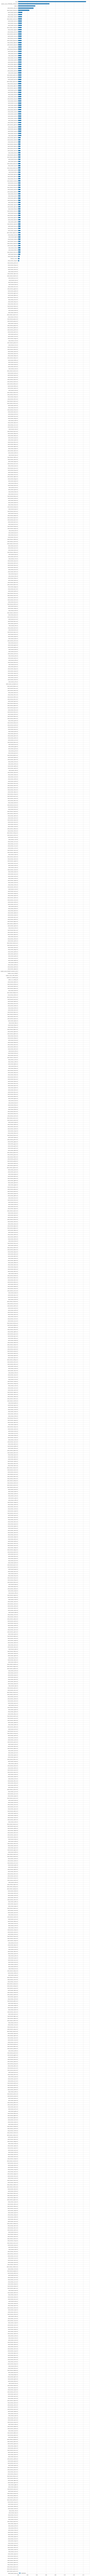

In [198]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbclf.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(X.shape[1])

# Print Ranking of features
print("Ranking of features:")
for v in range(X.shape[1]):
    print("%d. feature %d (%.2f)" % (v + 1, sorted_index[v], feature_importances[sorted_index[v]]))

# Define plot
df_feature_importance = pd.DataFrame(feature_importances, index=X.columns, columns=["Importance"])
df_feature_importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize = (16,len(feature_importances)/2));

**XGBoost**

In [199]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

[16:11:29] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [200]:
# y_predct as predictions for test data
y_pred4 = XGB_model.predict(X_test)
predict4 = [round(value) for value in y_pred4]

# Check predictions
score_xgb = accuracy_score(y_test, predict4)
print("Accuracy score: %.2f%% " % (score_xgb*100))

Accuracy score: 87.73% 


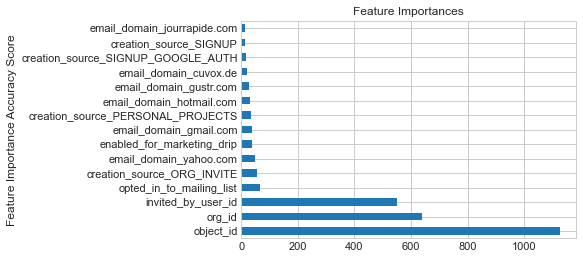

<Figure size 1440x576 with 0 Axes>

In [201]:
# Feature of importances plot
importances = pd.Series(XGB_model.get_booster().get_fscore()).sort_values(ascending=False)
importances.plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Accuracy Score')
plt.figure(figsize=(20,8))
plt.show()

In [202]:
f1_xgb = f1_score(y_test, y_pred4, average='weighted')

print('Gaussian Naive Bayes: Accuracy=%.3f' % score_xgb)
print('Gaussian Naive Bayes: f1-score=%.3f' % f1_xgb)

Gaussian Naive Bayes: Accuracy=0.877
Gaussian Naive Bayes: f1-score=0.824


**Random Forest**

Ranking of features:
1. feature 0 (0.35)
2. feature 3 (0.32)
3. feature 4 (0.16)
4. feature 1 (0.01)
5. feature 2 (0.01)
6. feature 5 (0.01)
7. feature 347 (0.01)
8. feature 301 (0.01)
9. feature 7 (0.01)
10. feature 448 (0.01)
11. feature 6 (0.01)
12. feature 138 (0.00)
13. feature 1120 (0.00)
14. feature 314 (0.00)
15. feature 8 (0.00)
16. feature 826 (0.00)
17. feature 590 (0.00)
18. feature 643 (0.00)
19. feature 393 (0.00)
20. feature 933 (0.00)
21. feature 295 (0.00)
22. feature 102 (0.00)
23. feature 493 (0.00)
24. feature 951 (0.00)
25. feature 830 (0.00)
26. feature 585 (0.00)
27. feature 391 (0.00)
28. feature 244 (0.00)
29. feature 753 (0.00)
30. feature 611 (0.00)
31. feature 789 (0.00)
32. feature 1032 (0.00)
33. feature 185 (0.00)
34. feature 343 (0.00)
35. feature 996 (0.00)
36. feature 845 (0.00)
37. feature 724 (0.00)
38. feature 272 (0.00)
39. feature 1059 (0.00)
40. feature 856 (0.00)
41. feature 576 (0.00)
42. feature 19 (0.00)
43. feature 461 (0.00)
44. feature 109

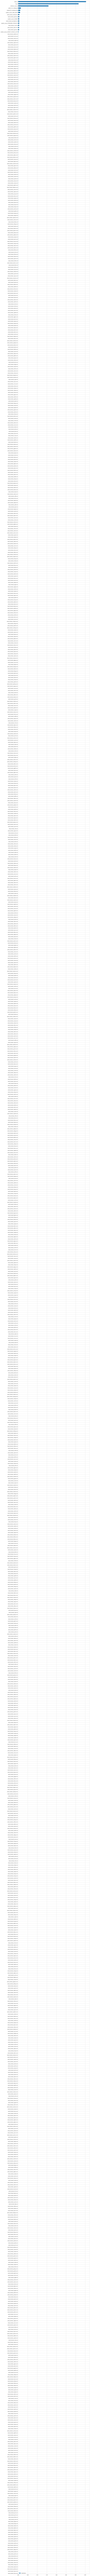

In [203]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Plot
plt.style.use('seaborn-whitegrid')
rfc_feature_importances = rfc.feature_importances_

# Define sigma and indexes
sigma = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indexes = np.argsort(rfc_feature_importances)[::-1]

# Print Ranking of features
print("Ranking of features:")
for v in range(X.shape[1]):
    print("%d. feature %d (%.2f)" % (v + 1, indexes[v], rfc_feature_importances[indexes[v]]))
    
# Define plot
rfc_feature_importance = pd.DataFrame(rfc_feature_importances, index=X.columns, columns=["Importance"])
rfc_feature_importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize = (16,len(rfc_feature_importances)/2));

In [204]:
# Get accuracy score for RandomForest
y_pred5 = rfc.predict(x_test_scale)
y_pred_prob = rfc.predict_proba(x_test_scale)
rfc_accuracy_score = accuracy_score(y_test, y_pred5)

f1_rfc = f1_score(y_test, y_pred5, average='weighted')
cm = confusion_matrix(y_test, y_pred5)

print('Random Forest: Accuracy=%.3f' % rfc_accuracy_score)
print('Random Forest: f1-score=%.3f' % f1_rfc)

Random Forest: Accuracy=0.877
Random Forest: f1-score=0.824


<AxesSubplot:>

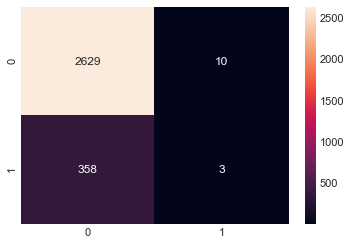

In [205]:
sns.heatmap(cm, annot=True, fmt='d')

**ROC Curve**

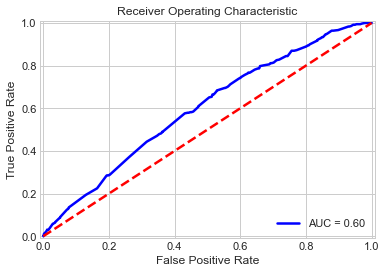

TypeError: cannot unpack non-iterable NoneType object

In [208]:
# ROC curve for GradientBoost
from sklearn.metrics import roc_auc_score

gbclf_roc_auc = roc_auc_score(y_test, gbclf.predict(X_test))
gbclf_fpr, gbclf_tpr, gbclf_thresholds = roc_curve(y_test, gbclf.predict_proba(X_test)[:,1])

# Plot 
plt.figure(figsize=(8,6))
plt.plot(gbclf_fpr, gbclf_tpr, label='Gradient Boost (area = %0.2f)' % gbclf_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

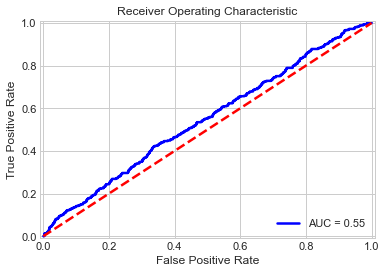

TypeError: cannot unpack non-iterable NoneType object

In [209]:
# ROC curve for XGBoost
from sklearn.metrics import roc_auc_score

xgb_roc_auc = roc_auc_score(y_test, XGB_model.predict(X_test))
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, XGB_model.predict_proba(X_test)[:,1])

# Plot 
plt.figure(figsize=(8,6))
plt.plot(xgb_fpr, xgb_tpr, label='Xtreme Gradient Boos (area = %0.2f)' % xgb_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### 3 Conclusion

A. GaussianNB and GradientBoosting Classifier came at first place with a performance score of about 88%.

B. XGBoost came in second for performance (87.73%) and Random Forest came in third (87.16%).

C. Comparing feature of importances (top 4):
- Gradient Boost: 1) org_id 2) creation_source_PERSONAL_projects 3) object_id 4) email_domain_yahoo.com
- XGBoost: 1)object_id 2) org_id 3) invited_by_user 4) opted_in_to_mailing_list
- Random Forest: 1) object_id 2) org_id 3) invited_by_user_id 4) opted_in_to_mailing list

D. GaussianNB and Random Forest had the same f-1 scores. XGBoost had the highest f1-score.